<a href="https://colab.research.google.com/github/astrapi69/DroidBallet/blob/master/MLG_D8_LC2_Combining_Supervised_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Q0'></a>
<center><a target="_blank" href="https://academy.constructor.org/"><img src="https://jobtracker.ai/static/media/constructor_academy_colour.b86fa87f.png" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>


_____

<center> <h1> Combining Supervised & Unsupervised learning </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2024</center>



# Task: Classification + Outlier Detection (Live Coding)


__1. Apply LOF and Isolation Forest to the Arrhythmia dataset and find the outliers in the dataset.__

__2. Compare the results from LOF and Isolation Forest.__

    - Use visualizations to show the detected outliers.
    - Run a vanilla RandomForest Classifier
    - Does the model perform better when outliers are removed?
    - Is there a difference in model performance when using LOF and Isolation Forest?


__Note:__

 - The purpose of this Notebook is to show how outliers can influence the performance of a classification model. Removing outliers blindly without investigating them further is not a good practice.
 - For more information about the dataset, visit https://archive.ics.uci.edu/ml/datasets/Arrhythmia
 - This dataset is a classification problem. The labels are in 'arrhythmia' column
 - Objective of the classification model is to distinguish between the presence and absence of cardiac arrhythmia and classify it in one of the 16 groups
 - Features include health information like height, weight, gender, age along with features from ECG analysis


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,  RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Helper function

model_accuracy = {}

def model_evaluation(model_name, predictions):

    print(classification_report(y_test, predictions))
    print('----------------------------------------------------------')
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100))
    print('----------------------------------------------------------')

    model_accuracy[model_name] = accuracy

In [ ]:
orig_url = "https://drive.google.com/file/d/1fJrXEXUWtCpbTfGnQg_7dX4mjNZM8b0x/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id

In [ ]:
df = pd.read_csv(dwn_url)
print(df.shape)
df.head()

(451, 263)


,sex,di_width_ragged_r_wave,di_width_diphasic_derivation_of_r_wave,di_width_ragged_p_wave,di_width_diphasic_derivation_of_p_wave,di_width_ragged_t_wave,di_width_diphasic_derivation_of_t_wave,dii_width_ragged_r_wave,dii_width_diphasic_derivation_of_r_wave,dii_width_ragged_p_wave,...,v5_amp_qrsta,v6_amp_jj_wave,v6_amp_q_wave,v6_amp_r_wave,v6_amp_s_wave,v6_amp_rp_wave,v6_amp_p_wave,v6_amp_t_wave,v6_amp_qrsa,v6_amp_qrsta
0,1,0,0,0,0,0,0,0,0,0,...,0.562792,-0.674491,0.000000,-0.087679,0.674491,0.0,-1.011736,0.674491,0.209639,0.633789
1,0,0,0,0,0,0,0,0,0,0,...,0.769005,2.473133,0.000000,0.200103,-0.797125,0.0,-0.674491,1.770538,-0.528655,1.226875
2,0,0,0,0,0,0,0,0,0,0,...,1.619637,0.674491,0.000000,0.922430,-0.674491,0.0,-0.337245,1.096047,1.503932,1.959512
3,0,0,0,0,0,0,0,0,0,0,...,0.799078,-0.449661,0.000000,1.148664,-1.532934,0.0,-2.023472,2.192095,0.665376,2.029287
4,0,0,0,0,0,0,0,0,0,0,...,0.807670,0.449661,-1.092245,0.922430,-1.042395,0.0,1.348982,0.758802,-0.419278,0.186066


In [ ]:
for column in df.columns:
  print(column)

sex
di_width_ragged_r_wave
di_width_diphasic_derivation_of_r_wave
di_width_ragged_p_wave
di_width_diphasic_derivation_of_p_wave
di_width_ragged_t_wave
di_width_diphasic_derivation_of_t_wave
dii_width_ragged_r_wave
dii_width_diphasic_derivation_of_r_wave
dii_width_ragged_p_wave
dii_width_diphasic_derivation_of_p_wave
dii_width_ragged_t_wave
dii_width_diphasic_derivation_of_t_wave
diii_width_ragged_r_wave
diii_width_diphasic_derivation_of_r_wave
diii_width_ragged_p_wave
diii_width_diphasic_derivation_of_p_wave
diii_width_ragged_t_wave
diii_width_diphasic_derivation_of_t_wave
avr_width_sp_wave
avr_width_ragged_r_wave
avr_width_diphasic_derivation_of_r_wave
avr_width_ragged_p_wave
avr_width_diphasic_derivation_of_p_wave
avr_width_ragged_t_wave
avr_width_diphasic_derivation_of_t_wave
avl_width_diphasic_derivation_of_r_wave
avl_width_ragged_p_wave
avl_width_diphasic_derivation_of_p_wave
avl_width_ragged_t_wave
avl_width_diphasic_derivation_of_t_wave
avf_width_ragged_r_wave
avf_width_diphasic

In [ ]:
df[['age', 'height','weight','heart_rate','v6_width_diphasic_derivation_of_t_wave','v6_width_diphasic_derivation_of_r_wave','arrhythmia']].head(10)

,age,height,weight,heart_rate,v6_width_diphasic_derivation_of_t_wave,v6_width_diphasic_derivation_of_r_wave,arrhythmia
0,0.551856,0.112415,-0.269796,-2.244932,0,0,6
1,0.429221,0.899321,1.821125,0.250529,0,0,10
2,0.490539,1.236566,1.753676,-0.088215,0,0,1
3,1.716886,2.922793,0.809389,0.000000,0,0,7
4,-2.084790,0.562076,-1.146634,0.894721,0,0,14
5,-0.429221,-0.449661,-1.079185,-0.178949,0,0,1
6,0.122635,-0.224830,-0.944287,-0.467402,0,0,1
7,-0.183952,0.449661,-0.809389,-0.782886,0,0,1
8,0.183952,0.337245,-0.067449,-0.894721,0,0,10
9,0.919760,0.674491,0.269796,-0.178949,0,0,3


In [ ]:
# looks like we dont have any missing values in the datarame
df.isnull().values.any()

False

## Data Cleaning and Preprocessing

### Feature Correlation

We are going to drop any features that have a correlation score higher than 0.85

In [ ]:
# Create correlation matrixas
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [ ]:
df.shape

(451, 263)

In [ ]:
df_reduced = df.drop(df[to_drop], axis=1)
print(df_reduced.shape)

(451, 223)


In [ ]:
# we set a seed for reproducibility
seed = 42

# Split train and test data
df_train, df_test = train_test_split(df_reduced, test_size=0.3, random_state=seed)

X_train = df_train.drop(['arrhythmia'], axis=1)
y_train = df_train.arrhythmia

X_test = df_test.drop(['arrhythmia'], axis=1)
y_test = df_test.arrhythmia

## RandomForest Classifier without removing outliers

In [ ]:
clf=RandomForestClassifier(random_state=seed)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

model_evaluation('Full Train Data', y_pred)

              precision    recall  f1-score   support

           1       0.84      1.00      0.91        74
           2       0.55      1.00      0.71         6
           3       1.00      0.83      0.91         6
           4       1.00      0.50      0.67         6
           5       1.00      0.25      0.40         4
           6       0.80      0.67      0.73         6
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         3
          10       0.89      0.77      0.83        22
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.83       136
   macro avg       0.54      0.46      0.47       136
weighted avg       0.80      0.83      0.80       136

----------------------------------------------------------
Accuracy: 83.09%
---

## Isolation Forest

In [ ]:
IsF = IsolationForest(random_state=seed, contamination=0.05) # assuming 5% data or less might be outliers

inlier_isf = IsF.fit_predict(X_train)
inlier_isf.shape

(315,)

In [ ]:
#Isolation forest lables outliers as -1 and inliers as 1

print('Number of datapoints: %d' % len(inlier_isf))
print('Number of innerliers: %d' % (inlier_isf == 1).sum())
print('Number of outliers: %d' % (inlier_isf == -1).sum())

Number of datapoints: 315
Number of innerliers: 299
Number of outliers: 16


In [ ]:
# We create a column to indicate which data points are outliers and which are not

df_train['outliers'] = inlier_isf
print(df_train.shape)
df_train.head()

(315, 224)


,sex,di_width_ragged_r_wave,di_width_diphasic_derivation_of_r_wave,di_width_ragged_p_wave,di_width_diphasic_derivation_of_p_wave,di_width_ragged_t_wave,di_width_diphasic_derivation_of_t_wave,dii_width_ragged_r_wave,dii_width_diphasic_derivation_of_r_wave,dii_width_ragged_p_wave,...,v5_amp_q_wave,v5_amp_r_wave,v5_amp_s_wave,v5_amp_p_wave,v5_amp_t_wave,v5_amp_qrsa,v6_amp_jj_wave,v6_amp_s_wave,v6_amp_qrsa,outliers
410,0,0,0,0,0,0,0,0,0,0,...,0.0,0.893286,-0.622607,-0.337245,0.061317,0.646387,-1.124151,-0.306587,-0.154951,1
108,0,0,0,0,0,0,0,0,0,0,...,0.0,0.470217,0.363187,-1.011736,-0.919760,0.983632,-1.124151,0.674491,0.756523,1
280,0,0,0,0,0,0,0,0,0,0,...,0.0,1.182696,-3.061150,-0.674491,1.594251,-0.203752,0.449661,-1.778203,-0.255213,1
421,1,0,0,0,0,0,0,0,0,0,...,0.0,0.912890,-0.051884,0.000000,0.919760,1.089022,-0.449661,-0.674491,1.330752,1
118,1,0,0,0,0,0,0,0,0,0,...,0.0,0.260285,-0.103768,0.337245,-0.122635,0.231856,-0.899321,-0.429221,0.373704,1


In [ ]:
df_train.outliers.value_counts()

 1    299
-1     16
Name: outliers, dtype: int64

In [ ]:
# remove any datapoints that are labeled as outliers

df_train_noOutliers= df_train[df_train.outliers == 1]
print(df_train_noOutliers.shape)
df_train_noOutliers.head()

(299, 224)


,sex,di_width_ragged_r_wave,di_width_diphasic_derivation_of_r_wave,di_width_ragged_p_wave,di_width_diphasic_derivation_of_p_wave,di_width_ragged_t_wave,di_width_diphasic_derivation_of_t_wave,dii_width_ragged_r_wave,dii_width_diphasic_derivation_of_r_wave,dii_width_ragged_p_wave,...,v5_amp_q_wave,v5_amp_r_wave,v5_amp_s_wave,v5_amp_p_wave,v5_amp_t_wave,v5_amp_qrsa,v6_amp_jj_wave,v6_amp_s_wave,v6_amp_qrsa,outliers
410,0,0,0,0,0,0,0,0,0,0,...,0.0,0.893286,-0.622607,-0.337245,0.061317,0.646387,-1.124151,-0.306587,-0.154951,1
108,0,0,0,0,0,0,0,0,0,0,...,0.0,0.470217,0.363187,-1.011736,-0.919760,0.983632,-1.124151,0.674491,0.756523,1
280,0,0,0,0,0,0,0,0,0,0,...,0.0,1.182696,-3.061150,-0.674491,1.594251,-0.203752,0.449661,-1.778203,-0.255213,1
421,1,0,0,0,0,0,0,0,0,0,...,0.0,0.912890,-0.051884,0.000000,0.919760,1.089022,-0.449661,-0.674491,1.330752,1
118,1,0,0,0,0,0,0,0,0,0,...,0.0,0.260285,-0.103768,0.337245,-0.122635,0.231856,-0.899321,-0.429221,0.373704,1


In [ ]:
# we resplit X and y on our dataframe without outliers

X_train_noOutliers = df_train_noOutliers.drop(['outliers', 'arrhythmia'], axis=1)
y_train_noOutliers = df_train_noOutliers.arrhythmia

In [ ]:
clf=RandomForestClassifier(random_state=seed)
clf.fit(X_train_noOutliers,y_train_noOutliers)
y_pred=clf.predict(X_test)

model_evaluation('Isolation Forest', y_pred)

              precision    recall  f1-score   support

           1       0.82      0.99      0.90        74
           2       0.40      1.00      0.57         6
           3       1.00      0.67      0.80         6
           4       1.00      0.33      0.50         6
           5       0.00      0.00      0.00         4
           6       0.67      0.67      0.67         6
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.85      0.77      0.81        22
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.78       136
   macro avg       0.36      0.34      0.33       136
weighted avg       0.72      0.78      0.73       136

----------------------------------------------------------
Accuracy: 77.94%
---

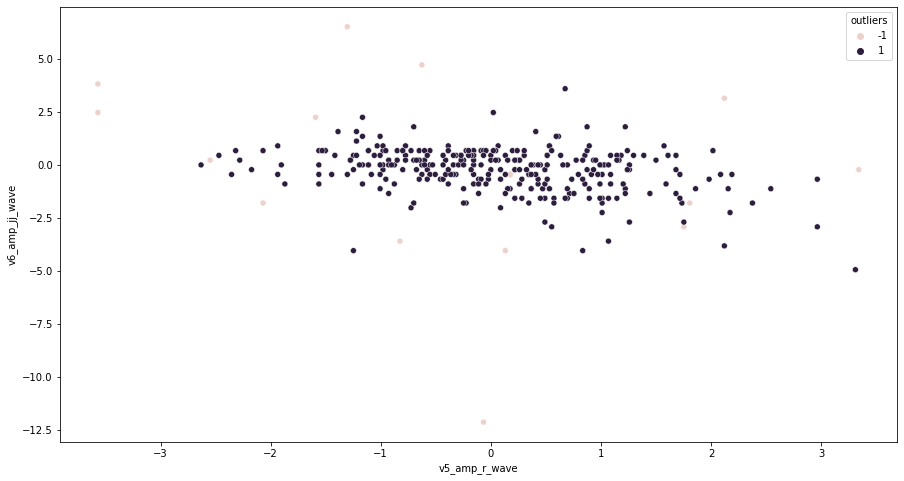

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="v5_amp_r_wave", y="v6_amp_jj_wave", data=df_train,  hue="outliers");

## Local Outlier Factor (LOF)

In [ ]:
LOF = LocalOutlierFactor(contamination=0.05) # assuming 5% data or more might be outliers

inlier_lof = LOF.fit_predict(df_train)

In [ ]:
#LOF also lables outliers as -1 and inliers as 1

print('Number of datapoints: %d' % len(inlier_lof))
print('Number of innerliers: %d' % (inlier_lof == 1).sum())
print('Number of outliers: %d' % (inlier_lof == -1).sum())

Number of datapoints: 315
Number of innerliers: 299
Number of outliers: 16


In [ ]:
df_train['outliers'] = inlier_lof
print(df_train.shape)
df_train.head()

(315, 224)


,sex,di_width_ragged_r_wave,di_width_diphasic_derivation_of_r_wave,di_width_ragged_p_wave,di_width_diphasic_derivation_of_p_wave,di_width_ragged_t_wave,di_width_diphasic_derivation_of_t_wave,dii_width_ragged_r_wave,dii_width_diphasic_derivation_of_r_wave,dii_width_ragged_p_wave,dii_width_diphasic_derivation_of_p_wave,dii_width_ragged_t_wave,dii_width_diphasic_derivation_of_t_wave,diii_width_ragged_r_wave,diii_width_diphasic_derivation_of_r_wave,diii_width_ragged_p_wave,diii_width_diphasic_derivation_of_p_wave,diii_width_ragged_t_wave,diii_width_diphasic_derivation_of_t_wave,avr_width_sp_wave,avr_width_ragged_r_wave,avr_width_diphasic_derivation_of_r_wave,avr_width_ragged_p_wave,avr_width_diphasic_derivation_of_p_wave,avr_width_ragged_t_wave,avr_width_diphasic_derivation_of_t_wave,avl_width_diphasic_derivation_of_r_wave,avl_width_ragged_p_wave,avl_width_diphasic_derivation_of_p_wave,avl_width_ragged_t_wave,avl_width_diphasic_derivation_of_t_wave,avf_width_ragged_r_wave,avf_width_diphasic_derivation_of_r_wave,avf_width_diphasic_derivation_of_p_wave,avf_width_ragged_t_wave,avf_width_diphasic_derivation_of_t_wave,v1_width_ragged_r_wave,v1_width_diphasic_derivation_of_r_wave,v1_width_ragged_p_wave,v1_width_diphasic_derivation_of_p_wave,...,v1_amp_jj_wave,v1_amp_s_wave,v1_amp_rp_wave,v1_amp_p_wave,v1_amp_t_wave,v1_amp_qrsa,v1_amp_qrsta,v2_amp_jj_wave,v2_amp_r_wave,v2_amp_s_wave,v2_amp_rp_wave,v2_amp_p_wave,v2_amp_t_wave,v2_amp_qrsa,v2_amp_qrsta,v3_amp_jj_wave,v3_amp_r_wave,v3_amp_s_wave,v3_amp_p_wave,v3_amp_t_wave,v3_amp_qrsa,v3_amp_qrsta,v4_amp_jj_wave,v4_amp_r_wave,v4_amp_s_wave,v4_amp_p_wave,v4_amp_t_wave,v4_amp_qrsa,v4_amp_qrsta,v5_amp_jj_wave,v5_amp_q_wave,v5_amp_r_wave,v5_amp_s_wave,v5_amp_p_wave,v5_amp_t_wave,v5_amp_qrsa,v6_amp_jj_wave,v6_amp_s_wave,v6_amp_qrsa,outliers
410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.517604,-1.582459,0.0,0.843113,1.079185,-1.573812,-0.121408,0.000000,-1.210995,0.442635,0.0,0.674491,1.461397,0.062582,1.495200,-0.786906,0.041496,0.000000,1.348982,0.899321,0.135905,0.979756,-2.529340,1.563119,-0.518839,0.337245,0.481779,1.118923,0.819969,-2.248303,0.0,0.893286,-0.622607,-0.337245,0.061317,0.646387,-1.124151,-0.306587,-0.154951,1
108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.348982,-1.167388,0.0,-0.337245,2.832861,-1.564444,1.200594,-1.079185,2.739851,-1.770538,0.0,-1.573812,0.281038,0.792700,0.599023,-1.911057,2.769578,-1.001517,-1.348982,-1.049208,2.305349,0.505868,-1.180359,1.172268,0.051884,-1.011736,-0.963558,1.223495,0.138866,-0.899321,0.0,0.470217,0.363187,-1.011736,-0.919760,0.983632,-1.124151,0.674491,0.756523,1
280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.517604,0.389129,0.0,-0.168623,1.483880,0.871217,1.854850,1.214083,0.669188,0.632335,0.0,-0.449661,1.798642,1.418517,2.301759,0.224830,1.677151,-0.143074,0.000000,1.948529,1.721461,2.372347,0.843113,1.757046,-1.556517,-0.337245,2.119828,0.941150,2.149113,0.674491,0.0,1.182696,-3.061150,-0.674491,1.594251,-0.203752,0.449661,-1.778203,-0.255213,1
421,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.337245,-0.856084,0.0,1.517604,-0.741940,-0.590179,-1.348982,0.134898,0.000000,-0.843113,0.0,0.899321,-0.112415,-0.778793,-0.674491,-0.562076,-0.409703,0.858443,0.674491,-0.337245,0.604022,0.008722,-0.505868,0.339579,0.492897,0.000000,0.096356,1.030036,0.575301,-0.224830,0.0,0.912890,-0.051884,0.000000,0.919760,1.089022,-0.449661,-0.674491,1.330752,1
118,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.168623,0.181594,0.0,0.674491,1.079185,0.243566,1.146634,-0.404694,0.638329,0.042156,0.0,-0.224830,0.112415,0.611909,0.570723,-0.899321,0.883516,0.061317,-0.674491,-0.374717,0.664424,0.162808,-1.011736,0.217143,0.311303,0.000000,-0.289067,0.486261,0.099190,-0.899321,0.0,0.260285,-0.103768,0.337245,-0.122635,0.231856,-0.899321,-0.429221,0.373704,1

In [ ]:
df_train.outliers.value_counts()

 1    299
-1     16
Name: outliers, dtype: int64

In [ ]:
df_train_noOutliers= df_train[df_train.outliers == 1]
df_train_noOutliers.shape

(299, 224)

In [ ]:
X_train_noOutliers = df_train_noOutliers.drop(['arrhythmia', 'outliers'], axis=1)
y_train_noOutliers = df_train_noOutliers.arrhythmia

In [ ]:
clf=RandomForestClassifier(random_state=seed)
clf.fit(X_train_noOutliers,y_train_noOutliers)
y_pred=clf.predict(X_test)

model_evaluation('LOF', y_pred)

              precision    recall  f1-score   support

           1       0.84      0.99      0.91        74
           2       0.42      0.83      0.56         6
           3       0.80      0.67      0.73         6
           4       1.00      0.33      0.50         6
           5       0.00      0.00      0.00         4
           6       0.62      0.83      0.71         6
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      0.67      0.80         3
          10       0.80      0.73      0.76        22
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.79       136
   macro avg       0.42      0.39      0.38       136
weighted avg       0.73      0.79      0.74       136

----------------------------------------------------------
Accuracy: 78.68%
---

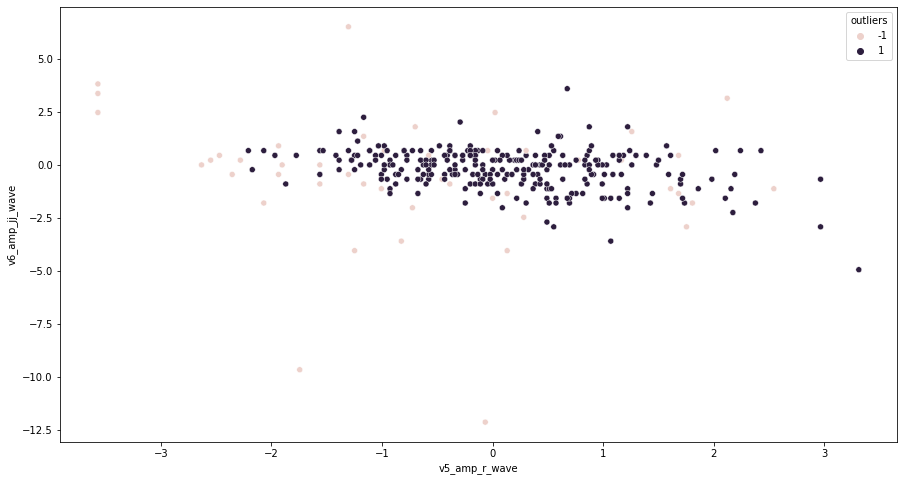

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="v5_amp_r_wave", y="v6_amp_jj_wave", data=df_train,  hue="outliers")

In [ ]:
model_accuracy

{'Full Train Data': 0.8308823529411765,
 'Isolation Forest': 0.8014705882352942,
 'LOF': 0.7867647058823529}

## Explanation

When removing outliers, we see that the model's performance dropped. More useful some outliers might be, (LOF removes more useful outliers than Isolation Forest), the lower our accuracy score becomes.

As a rule of thumb, removing outliers just because they are outliers rarely does any good. Without a deep and vested understanding of what the possible ranges exist within each feature, removing outliers becomes tricky.

The need (or lack of need) to remove outliers is also highly dependent on the model we used.

In this case extreme values might be because of extreme ECG readings which can actually help in predicting arrythmia better!


**In short, don't remove outliers just because they are abnormal. Investigate them first.**